In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [425]:
train_data = pd.read_excel(r"C:\Users\SAURABH\Desktop\Flight prediction/Data_Train.xlsx")

In [426]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [427]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [428]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [429]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Getting all the rows where we have missing values

In [430]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

## NaN = Not Available Number

In [431]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [432]:
train_data.dropna(inplace=True)

In [433]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [434]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [435]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


In [436]:
data = train_data.copy()

In [437]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [438]:
data.head(2)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [439]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [440]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [441]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [442]:
for feature in  ['Dep_Time', 'Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)

In [443]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [444]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [445]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [446]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [447]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-09-19 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-09-19 05:50:00,2025-09-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-09-19 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [448]:
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [449]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [450]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-09-19 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-09-19 05:50:00,2025-09-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-09-19 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [451]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-09-19 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-09-19 05:50:00,2025-09-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-09-19 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [452]:
cols_to_drop = ['Arrival_Time' , 'Dep_Time']
data.drop(cols_to_drop,axis=1,inplace=True)

In [453]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [454]:
data.shape

(10682, 16)

## Lets Analyse when will all most of the flights take off...

In [455]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [456]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif(x>8) and (x<=12):
         return "Morning"
    elif(x>12) and (x<=16):
         return "Afternoon"
    elif(x>16) and (x<=20):
        return "Evening"
    elif(x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<Axes: xlabel='Dep_Time_hour'>

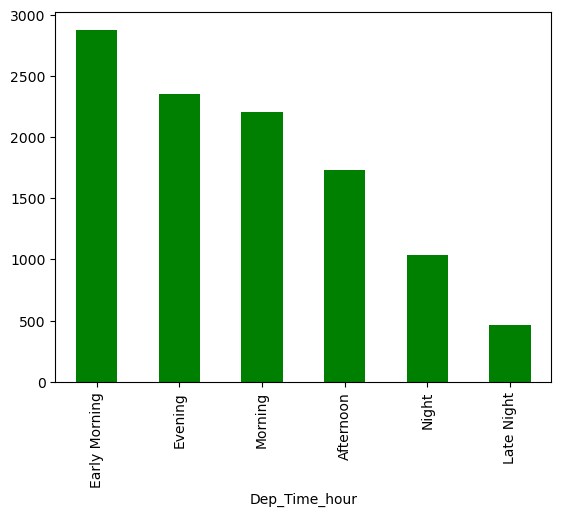

In [457]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar",color="green")

In [459]:
def preprocess_duration(x):
    if 'h' not in x :
        x= '0h' + ' ' + x
    elif 'm' not in x :
        x= x + ' ' + '0m'
    return x

In [460]:
data["Duration"] = data["Duration"].apply(preprocess_duration)

In [461]:
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [462]:
data["Duration"][0]

'2h 50m'

In [463]:
'2h 50m'.split(' ')

['2h', '50m']

In [464]:
'2h 50m'.split(' ')[0]

'2h'

In [465]:
'2h 50m'.split(' ')[0][0:-1]


'2'

In [466]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [467]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [468]:
data['Duration_hours'] = data['Duration'].apply(lambda x :int(x.split(' ')[0][0:-1]))

In [469]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [470]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


## Lets Analyse whether duration imapact on Price or Not..?

In [471]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [472]:
2*60

120

In [473]:
'2*60'

'2*60'

## eval is use for performing mathematical operation on string

In [474]:
eval('2*60')

120

In [475]:
data['Duration_total_mins'] = data['Duration'].str.replace('h',"*60").str.replace(' ' , "+").str.replace('m',"*1").apply(eval)

In [476]:
data['Duration_total_mins'] 

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [477]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

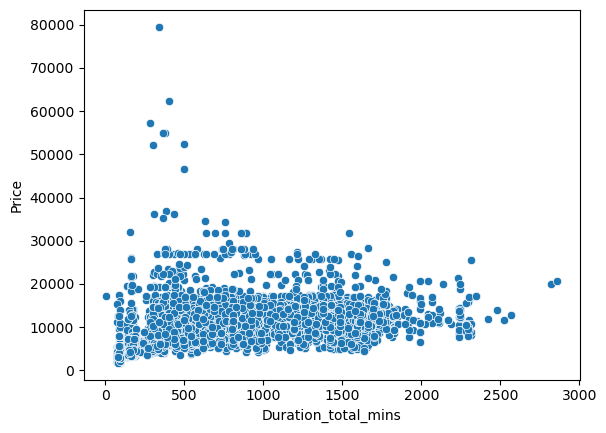

In [478]:
sns.scatterplot(x="Duration_total_mins",y="Price",data=data)

## As the duration increases prices also increases . if duration increase by 1 unit price will get increase by 0.6 unit because slope of line in 0.6

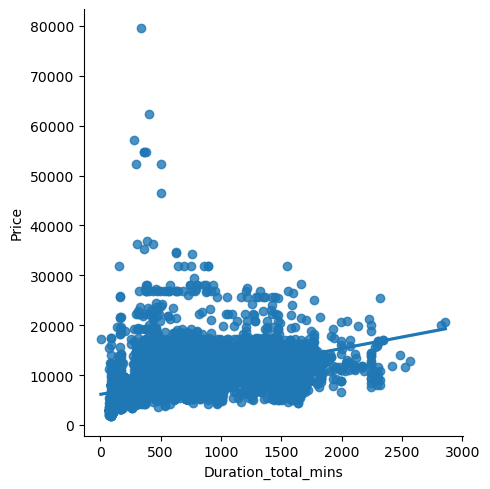

In [479]:
sns.lmplot(x="Duration_total_mins",y="Price",data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

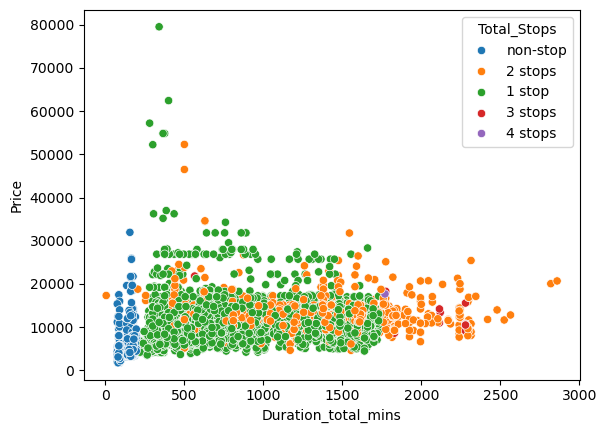

In [480]:
sns.scatterplot(x="Duration_total_mins",y="Price",hue="Total_Stops",data=data)

## On Which route Jet Airways is extremly used..?

In [481]:
data['Airline']=="Jet Airways"

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [482]:
data[data['Airline']=="Jet Airways"].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

## Airlines Vs Price Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

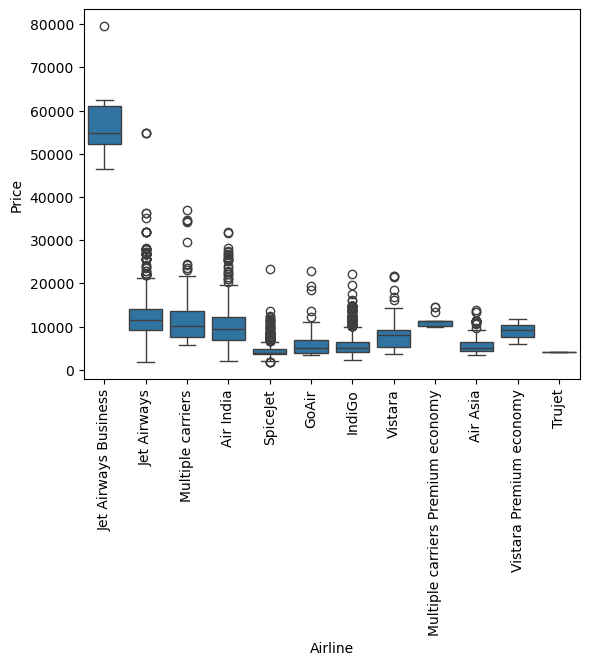

In [483]:
sns.boxplot(y='Price',x='Airline',data = data.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical")

## One hot encoding 

In [484]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [485]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [486]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [487]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [488]:
for sub_category in data['Source'].unique():
    data['Source_' + sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [489]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [490]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [491]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

## Let's Perform target guided encoding on Data

In [492]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [493]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index 

In [494]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [495]:
dict_airlines = {key : index for index,key in enumerate (airlines,0)}

In [496]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [497]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [498]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [499]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [500]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [501]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [502]:
data.Destination.unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [503]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index 

In [504]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [505]:
dict_dest = {key : index for index,key in enumerate (dest,0)}

In [506]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [507]:
data['Destination'] = data['Destination'].map(dict_dest)

In [508]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [509]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


## Manual Encoding

In [510]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [511]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [512]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [513]:
stop = {'non-stop': 0 , '2 stops' : 2, '1 stop' : 1, '3 stops' : 3, '4 stops' : 4}

In [514]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [515]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

## Remove Unnnecessary Features

In [516]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [517]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [518]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [519]:
data.drop(columns=['Date_of_Journey','Additional_Info','Source','Duration_total_mins','Journey_year'],axis=1,inplace=True)

In [520]:
data.head(3)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [521]:
data.drop(columns=['Duration'],axis=1,inplace=True)

In [522]:
data.head(3)

,Airline,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


## Lets Perform a Outlier detection

In [532]:
def plot(df,col):
    fig ,(ax1 , ax2 , ax3) = plt.subplots(3,1)

    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False) #Kernel density estimation use for histogram

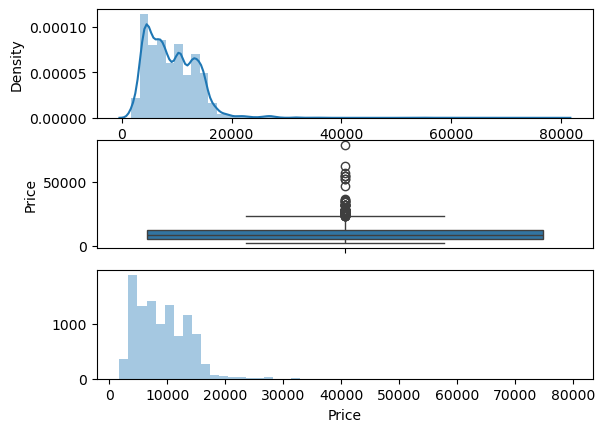

In [533]:
plot(data,'Price')

## To remove Outlier from any dataset .., replacing it with median value is the best approach 

In [543]:
print(maximum)

23017.0


In [544]:
print(minimum)

-5367.0


In [549]:
print([price for price in data['Price'] if price> maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [552]:
len([price for price in data['Price'] if price > maximum or price < minimum])

94

In [554]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

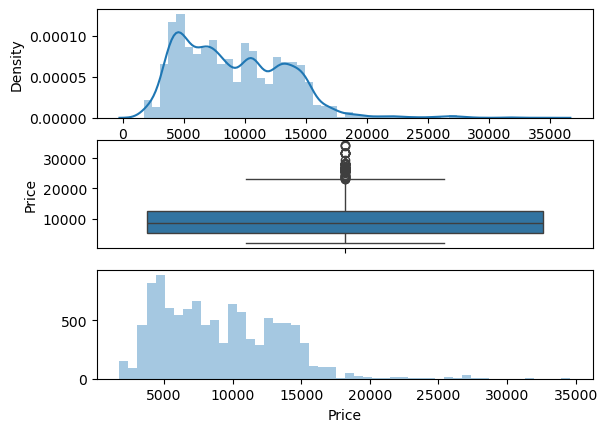

In [555]:
plot(data,'Price')

## Mutual information approach 

In [566]:
X=data.drop(['Price'],axis=1)

In [565]:
y=data['Price']

In [567]:
from sklearn.feature_selection import mutual_info_regression

In [692]:
# Import necessary libraries if not already imported
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Assuming X is your feature dataframe and y is your target variable
# First, identify and handle string columns in X

# Option 1: Drop string columns
# Find columns with string data
string_cols = X.select_dtypes(include=['object']).columns
X_numeric = X.drop(columns=string_cols)  # Keep only numeric columns

# Option 2: Or encode categorical variables if they're important
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False)
# X_encoded = pd.DataFrame(encoder.fit_transform(X[string_cols]))
# X_numeric = pd.concat([X.select_dtypes(exclude=['object']), X_encoded], axis=1)

# Now calculate mutual information with numeric data only
imp = mutual_info_regression(X_numeric, y)

# Map the importance scores back to feature names
feature_importance = pd.Series(imp, index=X_numeric.columns)

In [693]:
imp

array([1.32887824, 1.06932874, 0.79641415, 0.36956277, 0.6227632 ,
       0.92700564, 0.75748126, 1.13340145, 0.9125585 , 1.12445058,
       0.68409168, 0.38582188, 0.45275107, 0.52031463, 0.13413844,
       0.19789324])

In [698]:
imp_df = pd.DataFrame(imp,index=X_numeric.columns)

In [699]:
imp_df

,0
Airline,1.328878
Destination,1.069329
Total_Stops,0.796414
Journey_day,0.369563
Journey_month,0.622763
Dep_Time_hour,0.927006
Dep_Time_minute,0.757481
Arrival_Time_hour,1.133401
Arrival_Time_minute,0.912559
Duration_hours,1.124451


In [701]:
imp_df.columns = ['Importance']

In [702]:
imp_df

,Importance
Airline,1.328878
Destination,1.069329
Total_Stops,0.796414
Journey_day,0.369563
Journey_month,0.622763
Dep_Time_hour,0.927006
Dep_Time_minute,0.757481
Arrival_Time_hour,1.133401
Arrival_Time_minute,0.912559
Duration_hours,1.124451


In [704]:
imp_df.sort_values(by='Importance',ascending=False)

,Importance
Airline,1.328878
Arrival_Time_hour,1.133401
Duration_hours,1.124451
Destination,1.069329
Dep_Time_hour,0.927006
Arrival_Time_minute,0.912559
Total_Stops,0.796414
Dep_Time_minute,0.757481
Duration_mins,0.684092
Journey_month,0.622763


## Let's build ML model

In [716]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [717]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [718]:
from sklearn.ensemble import RandomForestRegressor

In [719]:
ml_model = RandomForestRegressor()

In [721]:
X_train = X_train.drop(columns=['Route'])
X_test = X_test.drop(columns=['Route'])


In [723]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [724]:
y_pred = ml_model.predict(X_test)

In [725]:
y_pred

array([16852.25,  5388.1 ,  8746.11, ...,  3536.75,  6340.71,  6801.76])

In [726]:
from sklearn import metrics 

In [727]:
metrics.r2_score(y_test,y_pred)

0.8112932948561706

## Let's Save Model

In [729]:
import joblib

In [751]:
joblib.dump(ml_model, r'C:\Users\SAURABH\Desktop\Flight prediction/random_forest_model.joblib')

['C:\\Users\\SAURABH\\Desktop\\Flight prediction/random_forest_model.joblib']

In [754]:
y_pred_loaded = ml_model_loaded.predict(X_test)

In [755]:
metrics.r2_score(y_test,y_pred_loaded)

0.8112932948561706

## how to define your evaluation metrices

In [758]:
def mape (y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [759]:
mape(y_test,y_pred)

np.float64(13.180442658919237)

## how to automate machine learning pipline

In [760]:
from sklearn import metrics

In [770]:
def predict (ml_model):
    model = ml_model.fit(X_train,y_train)
    print('t\Training Score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('prediction are : {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test,y_prediction)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('RMSE: {}'.format(np.sqrt (metrics.mean_squared_error(y_test,y_prediction))))
    print('MAPE: {}'.format(mape(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    

t\Training Score : 0.9516740150823987
prediction are : [16848.54  5311.91  8912.47 ...  3561.69  6415.14  6872.18]


r2 score : 0.8089323071734167
MAE : 1181.7361191947014
MSE : 3719629.3529453026
RMSE: 1928.634064032185
MAPE: 13.233246855180894


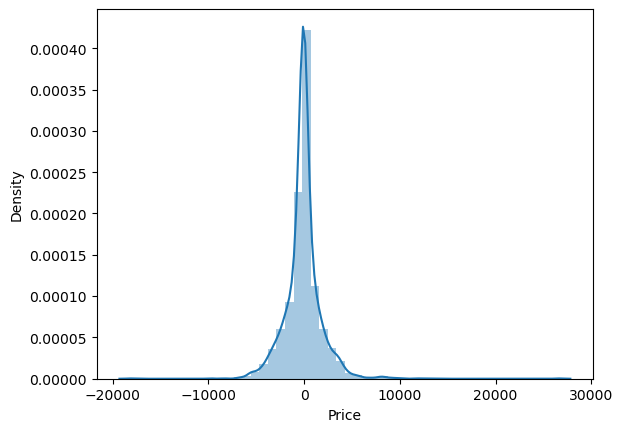

In [771]:
predict(RandomForestRegressor())

In [772]:
from sklearn.tree import DecisionTreeRegressor 

t\Training Score : 0.966591628243878
prediction are : [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 score : 0.6790595571231037
MAE : 1405.840883564208
MSE : 6247940.058373268
RMSE: 2499.587977722182
MAPE: 15.571923659187338


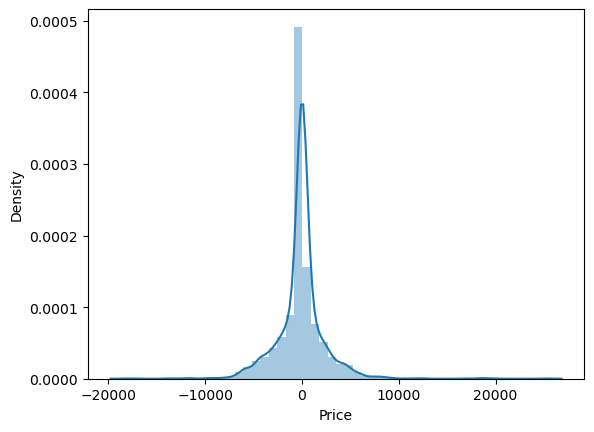

In [773]:
predict(DecisionTreeRegressor())